## Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import numpy as np
from matplotlib import font_manager, rc
from tqdm import tqdm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## Data load

In [2]:
path = '../data/'
data = pd.read_csv(path +'201901-202003.csv')
gc.collect()

7

### Get group data

In [3]:
group_data = data.loc[:,['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM', 'AMT']].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM']).sum()
group_data = np.log(group_data)

### Get error_group, uncomplete_group

In [4]:
days = group_data.reset_index()['REG_YYMM'].unique().astype('str') # REG_YYMM를 string으로 변환
citys = data.CARD_SIDO_NM.unique() # citys : 지역(시도)의 이름들을 list로 저장

std_list = []

error_group = [] # std가 0.3이상인 그룹 저장
uncomplete_group = [] # 모든 월별 데이터가 없는 그룹 저장

for city in tqdm(citys):
    clsses = data[data.CARD_SIDO_NM == city].STD_CLSS_NM.unique()
    # 특정지역에서는 업종이 없는 경우도 있음.
    # 지역별로 업종 list를 새로 생성
    for clss in clsses:
        y = group_data.loc[city, clss,:].values.reshape(-1)
        if len(y) == len(days):
            
            x = np.arange(12).reshape(-1,1)
            y_pred = np.zeros(12)
            y_pred[:] = y[:12].mean()
            std_list.append(y[:12].std())
            
            if 0.3 < y[:12].std():
                error_group.append((city, clss))
            else: 
                pass
        else:
            uncomplete_group.append((city, clss))
del group_data
gc.collect()

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:58<00:00,  3.46s/it]


0

In [5]:
error_group[:10] # std가 0.3을 넘는 그룹 중 10개만 보여주기

[('강원', '골프장 운영업'),
 ('강원', '관광 민예품 및 선물용품 소매업'),
 ('강원', '전시 및 행사 대행업'),
 ('강원', '호텔업'),
 ('강원', '휴양콘도 운영업'),
 ('강원', '여행사업'),
 ('강원', '자동차 임대업'),
 ('강원', '기타 수상오락 서비스업'),
 ('강원', '내항 여객 운송업'),
 ('경기', '골프장 운영업')]

In [6]:
uncomplete_group[:10] # 모든 월별 데이터가 없는 그룹 중 10개만 보여주기

[('강원', '면세점'),
 ('강원', '버스 운송업'),
 ('강원', '택시 운송업'),
 ('강원', '그외 기타 분류안된 오락관련 서비스업'),
 ('경기', '내항 여객 운송업'),
 ('경기', '그외 기타 분류안된 오락관련 서비스업'),
 ('경남', '자동차 임대업'),
 ('경북', '그외 기타 분류안된 오락관련 서비스업'),
 ('경북', '여행사업'),
 ('경북', '내항 여객 운송업')]

### Get [group_city_clss_time]

In [10]:
# 데이터를 날짜, 도시, 업종으로 groupby
# 인덱싱을 편하게 하기 위해 row를 CARD_SIDO_NM,	STD_CLSS_NM, REG_YYMM 3개의 level로 표현
group_city_clss_time = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .sum()

group_city_clss_time = pd.DataFrame(group_city_clss_time)
gc.collect()

# group_data는 'AMT'하나만 column으로 갖는다.
#group_city_clss_time = np.log(group_city_clss_time)
group_city_clss_time

AMT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM           
강원           건강보조식품 소매업  201901    148354746
                         201902    146715871
                         201903    109439025
                         201904    106548473
                         201905    148115738
...                                      ...
충북           휴양콘도 운영업    201911    124117555
                         201912    139568962
                         202001    222073112
                         202002     47085830
                         202003     12733490

[9438 rows x 1 columns]

### Get [group_city_clss_count]

In [11]:
group_city_clss_time_count = data.loc[:, ['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]\
                           .groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'REG_YYMM'])['AMT']\
                           .count()

group_city_clss_time_count = pd.DataFrame(group_city_clss_time_count)
group_city_clss_time_count.columns = ['COUNT']

gc.collect()
group_city_clss_time_count

COUNT
CARD_SIDO_NM STD_CLSS_NM REG_YYMM       
강원           건강보조식품 소매업  201901       94
                         201902      104
                         201903       86
                         201904      104
                         201905      108
...                                  ...
충북           휴양콘도 운영업    201911      319
                         201912      349
                         202001      484
                         202002      127
                         202003       35

[9438 rows x 1 columns]

### Get [group_city_clss]

In [12]:
group_city_clss = pd.DataFrame(data.loc[:, ['CARD_SIDO_NM',
                          'STD_CLSS_NM',
                          'AMT']].groupby(['CARD_SIDO_NM',
                                          'STD_CLSS_NM'])['AMT'].sum())
#group_city_clss['AMT'] = np.log(group_city_clss['AMT'])
#group_city_clss = group_city_clss.reset_index() #index를 column에 포함시키기
group_city_clss

AMT
CARD_SIDO_NM STD_CLSS_NM                        
강원           건강보조식품 소매업               1820824382
             골프장 운영업                 51290887138
             과실 및 채소 소매업             16675489268
             관광 민예품 및 선물용품 소매업         457212008
             그외 기타 분류안된 오락관련 서비스업         177000
...                                          ...
충북           피자 햄버거 샌드위치 및 유사 음식점업   21294163365
             한식 음식점업                327145423793
             호텔업                       530914357
             화장품 및 방향제 소매업            9175488855
             휴양콘도 운영업                 2414736980

[650 rows x 1 columns]

### Make Plot Function

In [13]:
def plot_groups_by_month(group_list, log = False):
    plt.figure(figsize = (15,30))
    for index in range(len(group_list)):
        all_month = ['201901', '201902', '201903', '201904', '201905', '201906', '201907',
                 '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']
        new_y = {}
        city, clss = group_list[index]
        for month in all_month:
            if month in list(map(str, group_city_clss_time.loc[city, clss].index)):
                new_y[month] = int(group_city_clss_time.loc[city, clss, int(month)])
            else:
                new_y[month] = 0
                
        new_y = list(new_y.values())
        if log == True:
            new_y = np.log(new_y)
            
        plt.plot(all_month, new_y, 'o-', label = group_list[index])
        plt.legend(bbox_to_anchor=(1.0, 1.0), fontsize = 15)
        #plt.title(group_list[index][0])
        plt.xticks(rotation = 45, fontsize = 15)
    plt.show()
    
def plot_city_clss_by_month(city, clss, color = 'red', count_ratio = 1):
    all_month = ['201901', '201902', '201903', '201904', '201905', '201906', '201907',
                 '201908', '201909', '201910', '201911', '201912', '202001', '202002', '202003']
    new_amt = {}
    new_count = {}
    mean_amt = group_city_clss_time.loc[city, clss].mean()
    print('<AMT인 년월>')
    zero_month = []
    for month in all_month:
        if month in list(map(str, group_city_clss_time.loc[city, clss].index)):
            new_amt[month] = int(group_city_clss_time.loc[city, clss, int(month)])
            new_count[month] = int(group_city_clss_time_count.loc[city, clss, int(month)]) * mean_amt/10 * count_ratio
        else:
            new_amt[month] = 0
            new_count[month] = 0
            zero_month.append(month)
    print(zero_month)
    plt.plot(all_month, list(new_amt.values()), 'o-', color = color, label = 'AMT')
    plt.plot(all_month, list(new_count.values()), 'o-', label  = 'COUNT')
    plt.legend()
    plt.title(city + ' ' + clss)
    plt.xticks(rotation = 45)
    plt.show()

### Plot all error_grup in orginal scale

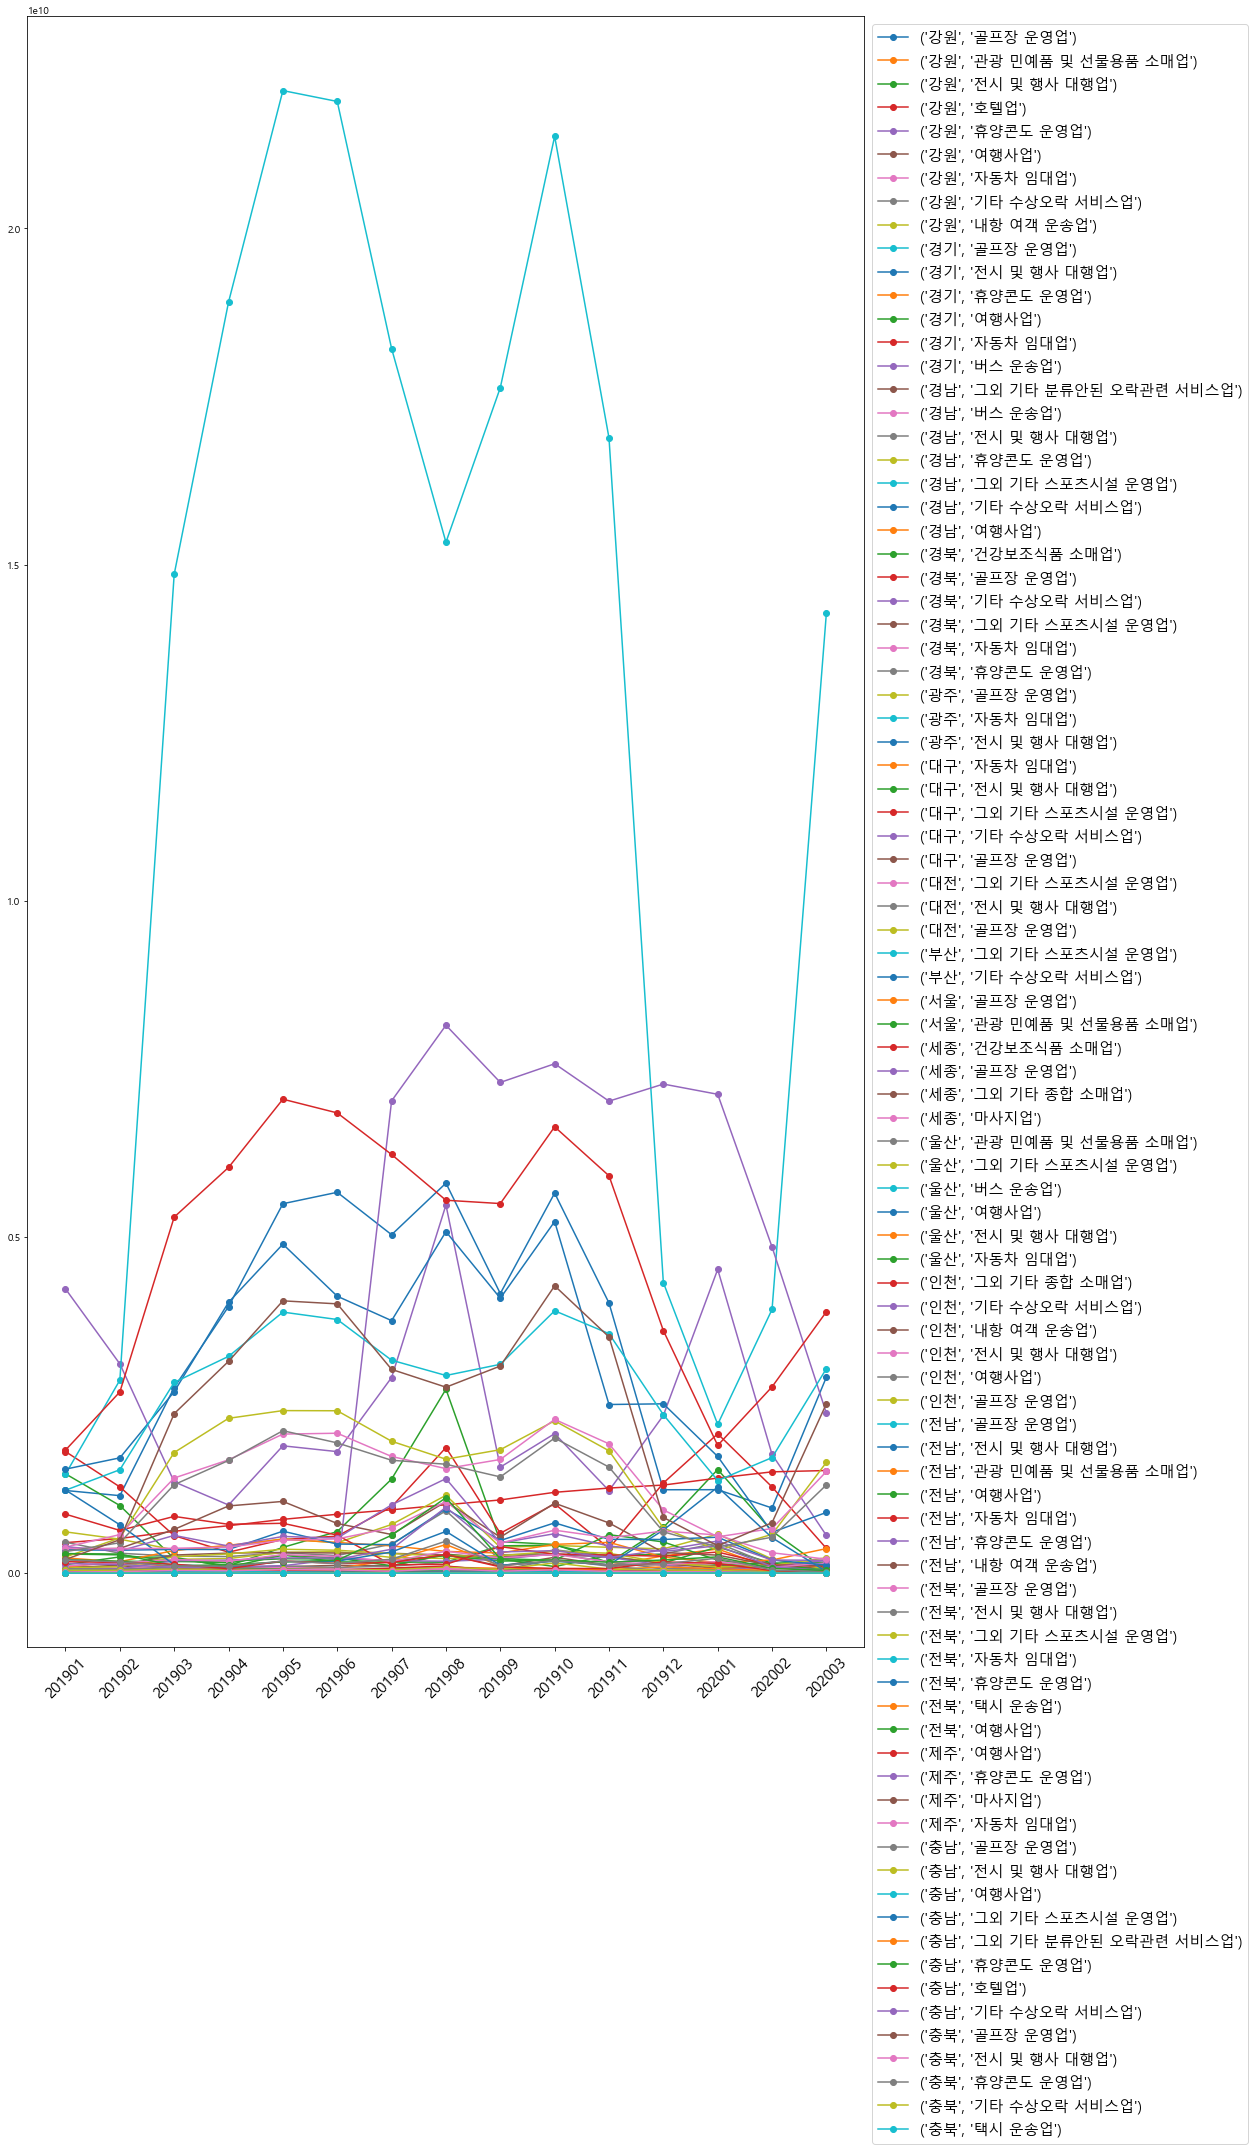

In [17]:
plot_groups_by_month(error_group)

### Plot all error_group in log sclae

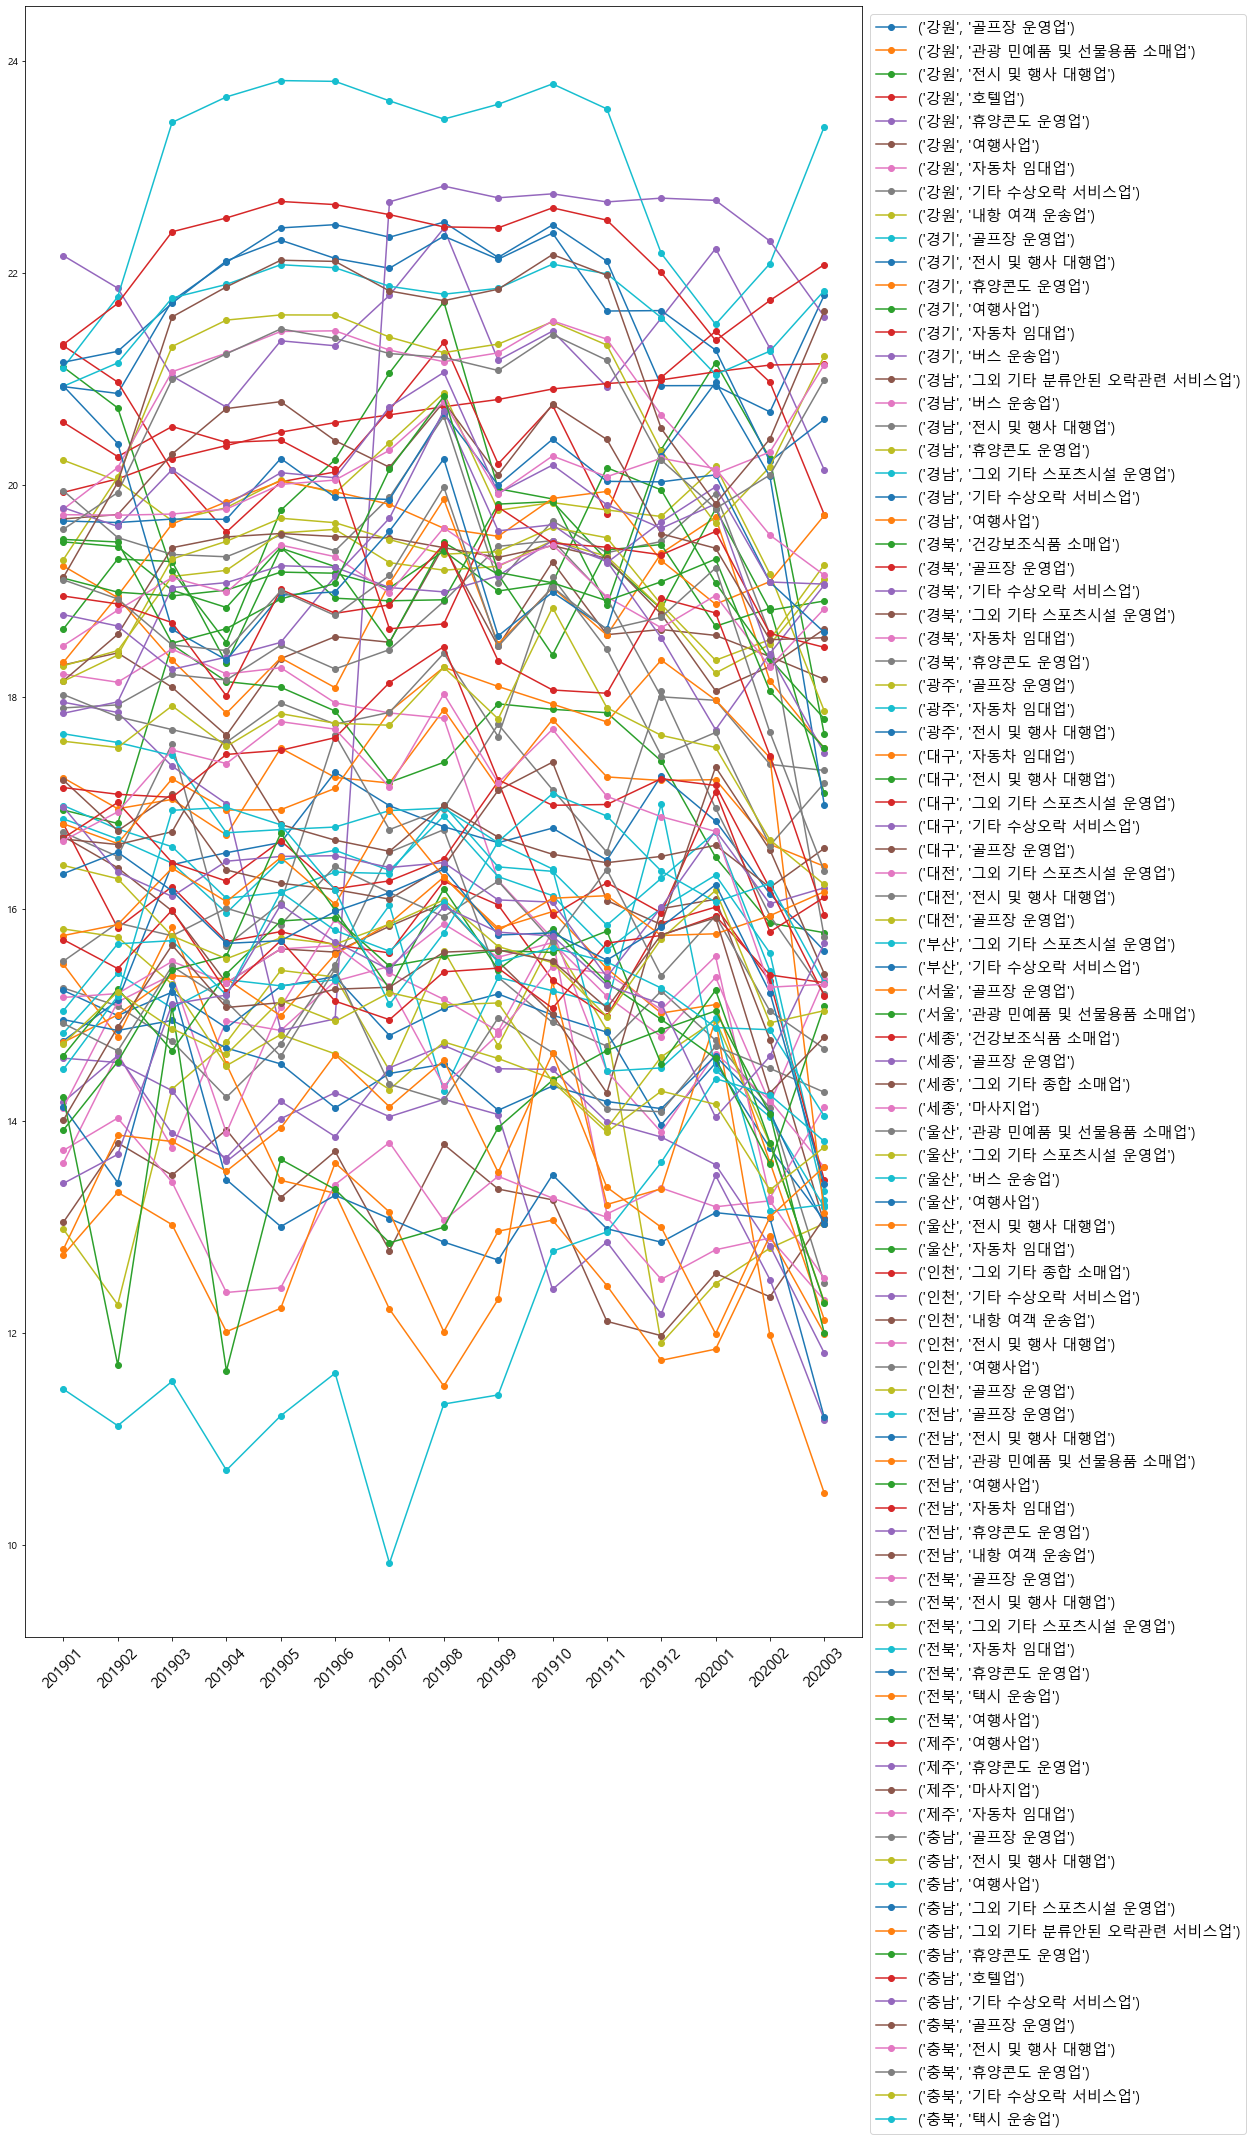

In [19]:
plot_groups_by_month(error_group, log = True)

## Find Pattern
1. Non-Cov AMT 결정
#### Pseudocode
```python
    if std > 0.3:
        if p > p_th:  ## 변동성이 적다.
            if 변화가 선형적이다: .........1)
                예측7월 <- 올해4월
                올해4월 <- 올해 3월
                
            else 변화가 비선형적이다:
                if 계절성을 갖는다.: .........2)
                    예측7월 <- 작년 7월
                    예측4월 <- 작년 4월

                elif 특별한 규칙이 없다: .........3)
                    예측7월 <- 전체 평균을 사용
                    예측4월 <- 전체 평균을 사용
                    
        elif p <= p_th:  ## 변동성이 크다.
            if 변화가 선형적이다: .........4)
                예측7월 <- 올해4월

            else 변화가 비선형적이다:
                if 계절성을 갖는다.: .........5)
                    예측7월 <- 작년 6월 ~ 8월 평균
                    예측4월 <- 작년 2월 ~ 3월 평균

                elif 특별한 규칙이 없다: .........6)
                    예측7월 <- 전체 평균을 사용
                    예측4월 <- 전체 평균을 사용
            
    else std <= 0.3:
        전체 평균을 사용한다. .........7)
```

In [86]:
data.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [88]:
data.STD_CLSS_NM.unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업',
       '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

<AMT인 년월>
[]


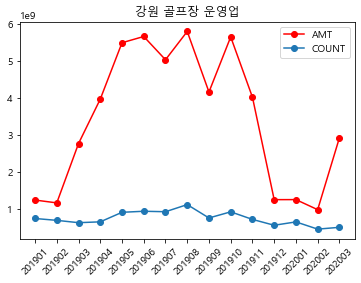

'\n4월 :\n7월 : \n'

In [84]:
i = 0
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.001)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


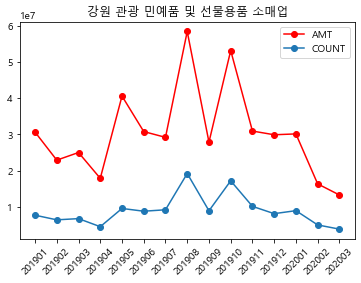

'\n4월 :\n7월 : \n'

In [89]:
i = 1
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


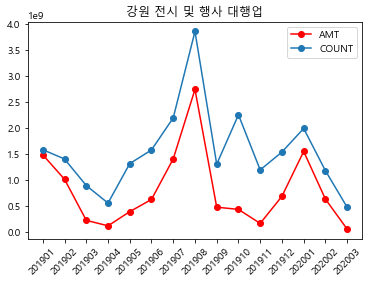

'\n4월 :\n7월 : \n'

In [90]:
i = 2
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


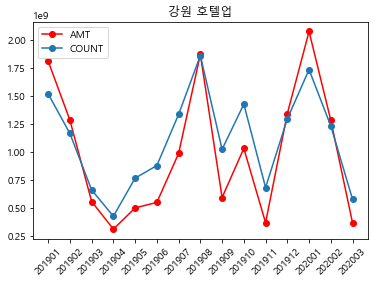

'\n4월 :\n7월 : \n'

In [91]:
i = 3
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


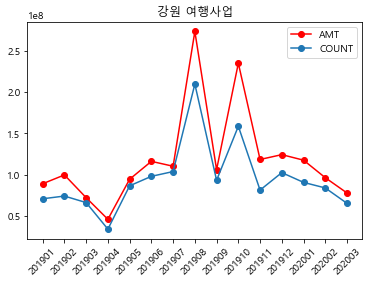

'\n4월 :\n7월 : \n'

In [25]:
i = 5
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


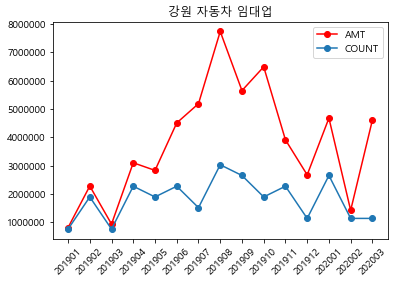

'\n4월 :\n7월 : \n'

In [30]:
i = 6
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


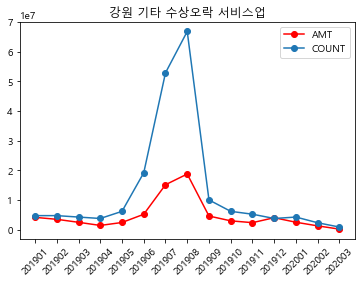

'\n4월 :\n7월 : \n'

In [31]:
i = 7
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


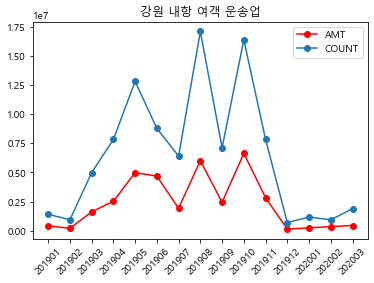

'\n4월 :\n7월 : \n'

In [32]:
i = 8
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 1)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


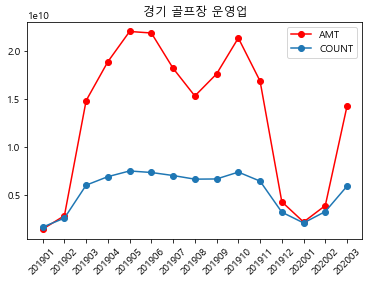

'\n4월 :\n7월 : \n'

In [36]:
i = 9
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.001)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


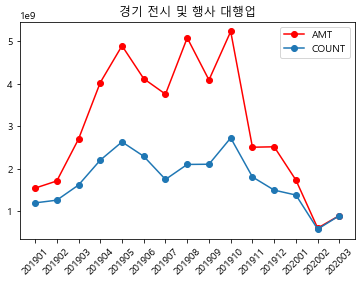

'\n4월 :\n7월 : \n'

In [37]:
i = 10
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.001)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


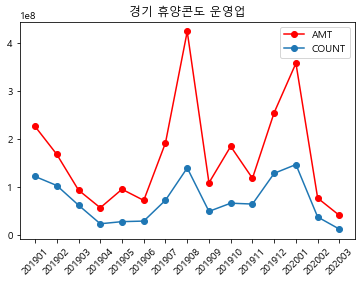

'\n4월 :\n7월 : \n'

In [39]:
i = 11
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


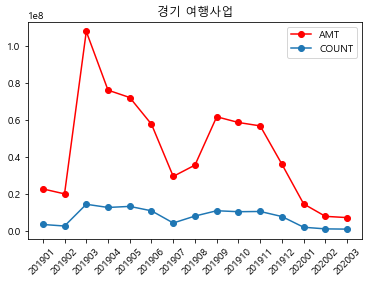

'\n4월 :\n7월 : \n'

In [44]:
i = 12
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

<AMT인 년월>
[]


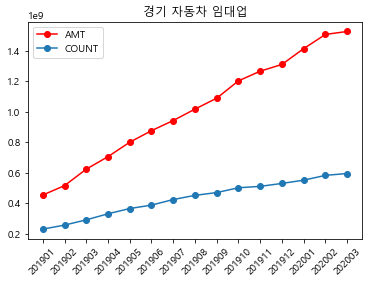

'\n4월 :\n7월 : \n'

In [45]:
i = 13
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

In [ ]:
i = 14
plot_city_clss_by_month(error_group[i][0], error_group[i][1], count_ratio = 0.01)
'''
4월 :
7월 : 
'''

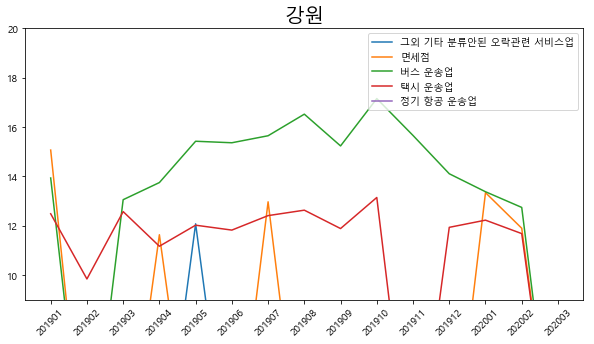

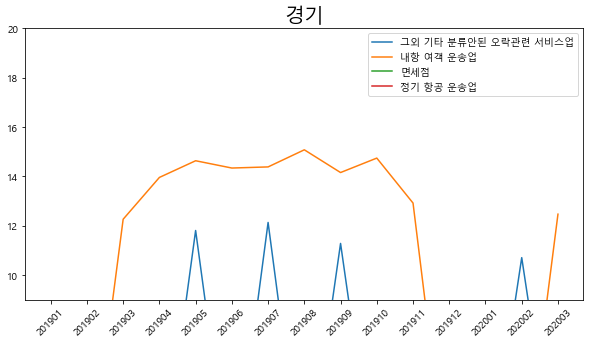

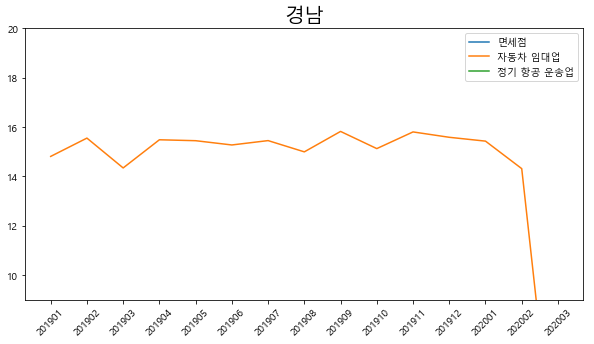

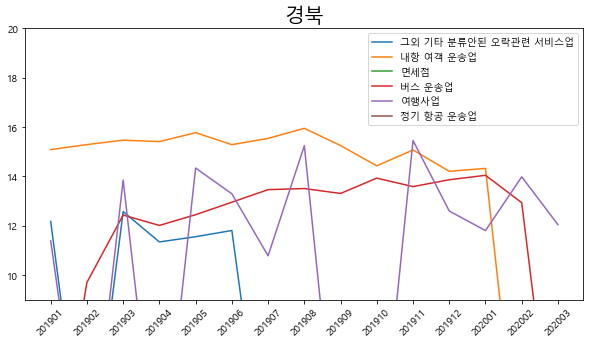

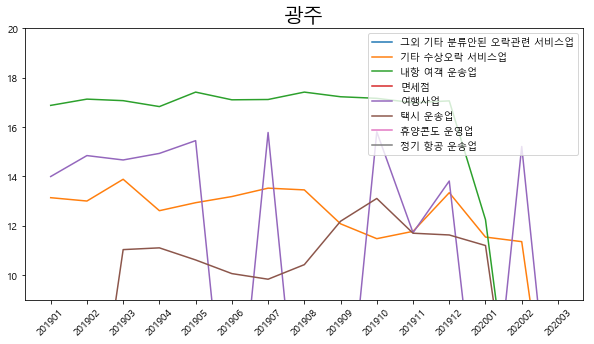

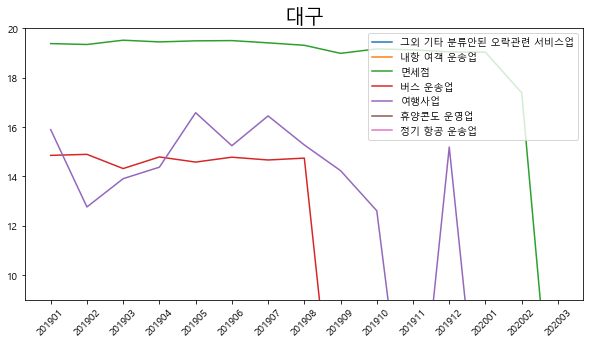

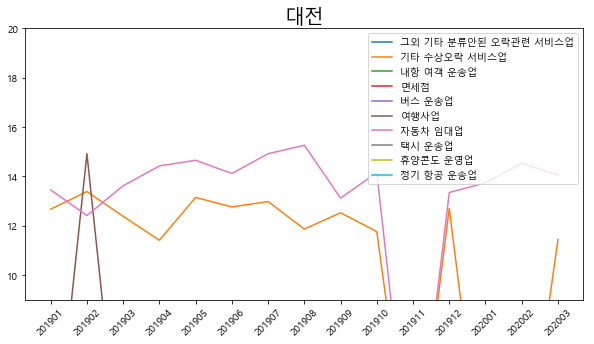

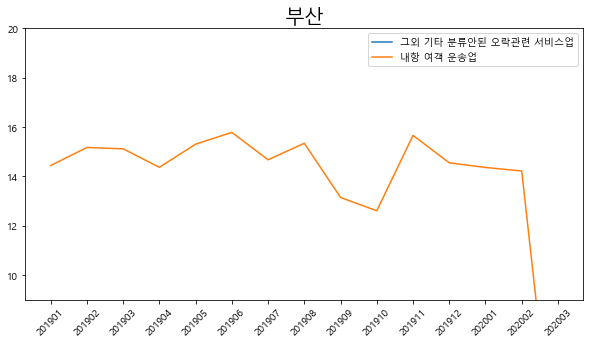

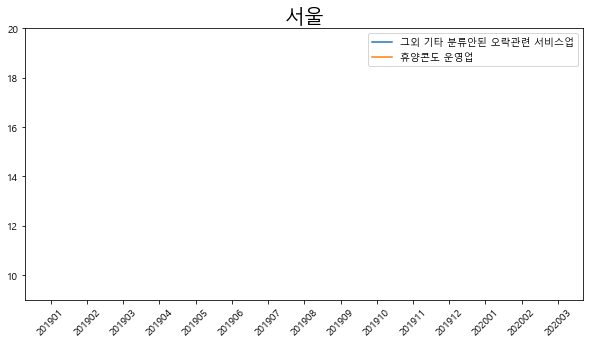

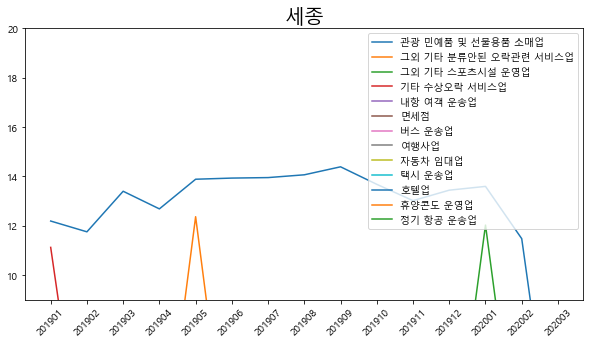

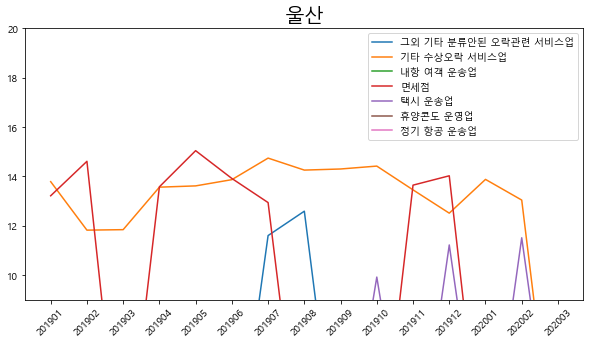

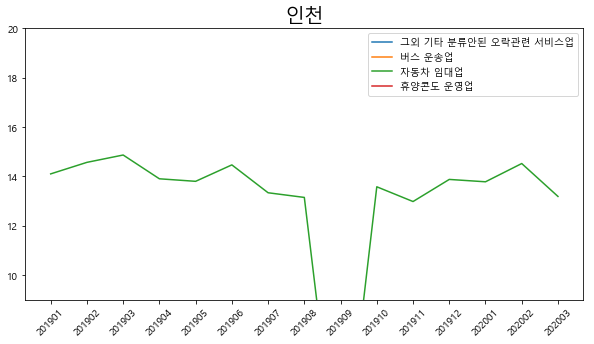

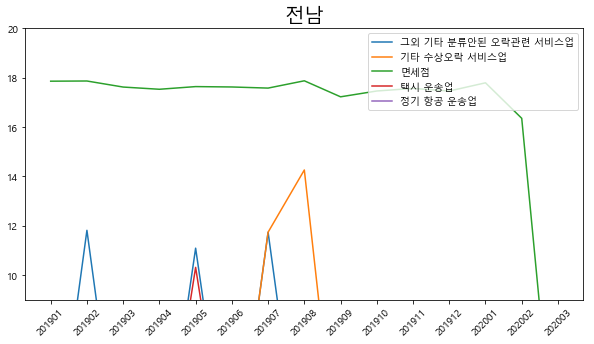

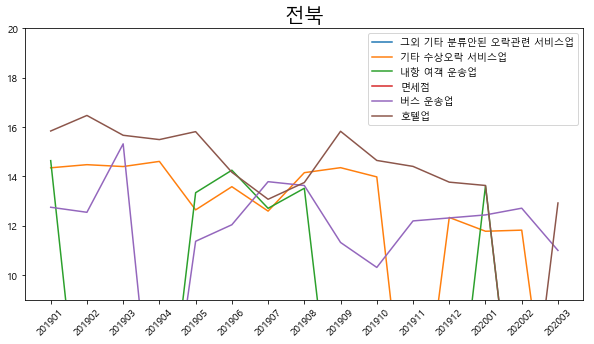

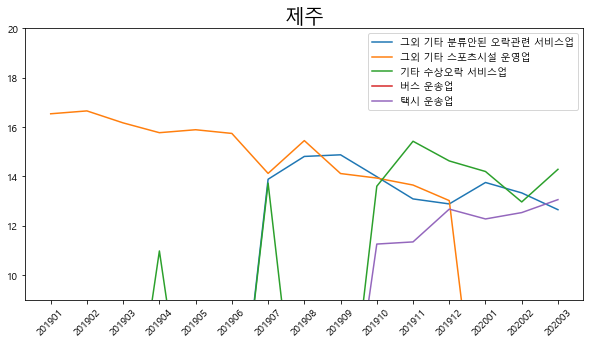

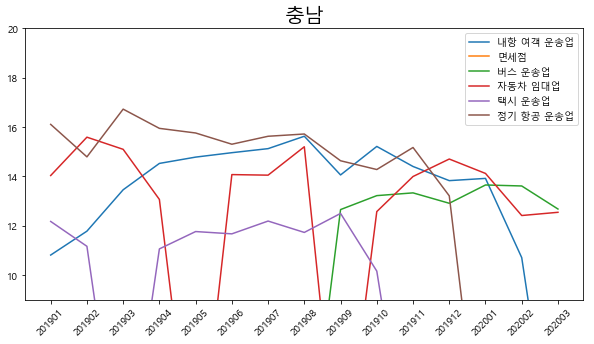

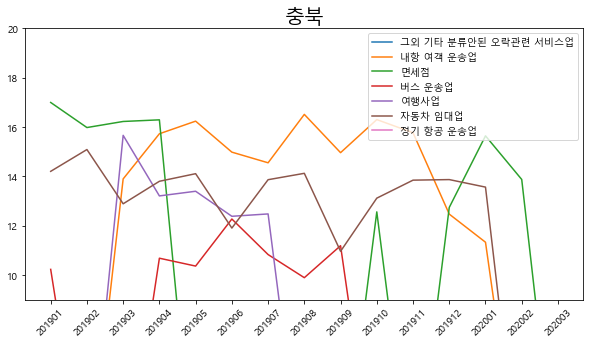

In [9]:
group_data = data.loc[:,['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM', 'AMT']].groupby(['CARD_SIDO_NM', 'STD_CLSS_NM','REG_YYMM']).sum()
group_data = np.log(group_data)
df = group_data.reset_index()
clsses = df.STD_CLSS_NM.unique()

for city in citys:
    plt.figure(figsize = (10, 5))
    df_ = df[df.CARD_SIDO_NM == city][['REG_YYMM','STD_CLSS_NM','AMT']]
    for clss in clsses:
        if len(days) == len(df_[df_.STD_CLSS_NM == clss]):
            pass
        else:
            df_clss = df_[df_.STD_CLSS_NM == clss]
            na_to_one = pd.DataFrame({'REG_YYMM': days, 'STD_CLSS_NM': clss})
            na_to_one.REG_YYMM = na_to_one.REG_YYMM.astype('int64')
            na_to_one = na_to_one.merge(df_clss, on='REG_YYMM', how='outer').drop('STD_CLSS_NM_y', axis=1).fillna(1)
            y = na_to_one["AMT"]   
            plt.plot(days, y, label = clss)
            plt.xticks(rotation = 45)
            plt.ylim(9, 20)
    plt.title(city, size = 20)
    plt.legend(loc = 'upper right')
    plt.show()

# 면세점
## 올해 면세점 매출(전국)
- 1월 2조247억여원
- 석 달 연속 감소하며 4월에는 1조원 미만으로 떨어졌다.
- 그러다 5월 3% 증가한 뒤 두 달 연속 증가세를 이어가며 1조원 초반대를 유지하고 있다.
- 제주 지역 지정면세점 매출은 5월 390억여원에서 6월에는 420억여원으로 증가했다.
- 면세점 매출: 2월부터 반토막 -> 서울이나 다른 지역에 적용 가능할 듯
- 5월 기사: 제주도 서비스업 생산에서 가장 많이 떨어진 분야는 정보통신(-28%)과 숙박·음식점(-23.8%)이다. 코로나19 확진자가 급증했던 대구의 숙박·음식점업 생산은 26%, 운수·창고업은 23.8% 떨어졌다. 경북 지역 역시 숙박·음식점업 생산은 23.0%, 운수·창고업은 11.9% 감소했다.

# 0 예측
## 강원
- 그외 기타 분류안된 오락관련 서비스업: 0
- 면세점: ????
- 버스 운송업: ????
- 택시 운송업: 평균
- 정기 항공 운송업: 0

## 경기
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: 작년 7월 * 코로나상수
- 면세점: 0
- 정기 항공 운송업: 0

## 경남
- 면세점: 0
- 자동차 임대업: 작년 7월 * 코로나상수
- 정기 항공 운송업: 0

## 경북
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: 작년 7월 * 코로나상수
- 면세점: 0
- 버스 운송업: 작년 7월 * 코로나상수
- 여행사업: ????

## 광주
- 그외 기타 분류안된 오락관련 서비스업: 0
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 내항 여객 운송업: 작년 7월 * 코로나상수
- 면세점: 0
- 여행사업: 작년 7월 * 코로나상수
- 택시 운송업: 작년 7월비슷
- 휴양콘도 운영업: 0
- 정기 항공 운송업: 0

## 대구
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: 0
- 면세점: 작년 7월 * 1/2
- 버스 운송업: 0
- 여행 사업: ???
- 휴양콘도 운영업: 0
- 정기 항공 운송업: 0

## 대전
- 그외 기타 분류안된 오락관련 서비스업: 0
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 내항 여객 운송업: 0
- 면세점: 0
- 버스 운송업: 0
- 여행사업: 0
- 자동차 임대: 작년 7월 * 코로나상수
- 택시 운송업: 0
- 휴양콘도 운영업: 0
- 정기 항공 운송업: 0

## 부산
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: 작년 7월 * 코로나상수

## 서울
- 그외 기타 분류안된 오락관련 서비스업: 0
- 휴양콘도 운영업: 0

## 세종
- 관광 민예품 및 선물용품 소매업: 작년 7월 * 코로나상수
나머지 모두 0

울산
- 그외 기타 분류안된 오락관련 서비스업: 0
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 면세점: 작년 7월 * 1/2? 0?
나머지 모두 0

## 인천
- 자동차 임대업: 작년 7월 * 코로나상수
나머지 모두 0

## 전남
- 면세점: 작년 7월 * 1/2
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수 (7, 8월만 운영하는 듯)

## 전북
- 그외 기타 분류안된 오락관련 서비스업: 0
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 내항 여객 운송업: 작년 7월 * 코로나상수? 0?
- 면세점: 0
- 버스 운송업: 작년 7월 * 코로나상수
- 호텔업: 작년 7월 * 코로나상수

## 제주
- 그외 기타 분류안된 오락관련 서비스업: 작년 7월 * 코로나상수
- 그외 기타 스포츠시설 운영업: 
- 기타 수상오락 서비스업: 작년 7월 * 코로나상수
- 버스 운송업: 0
- 택시 운송업: 0은 아님, 다른 지역 추이와 비교해야 할 듯(코로나 영향, 주기성 등), 평균값도 괜찮을듯

## 충남
- 내항 여객 운송업: 작년 7월 * 코로나상수
- 면세점: 0
- 버스 운송업: 0은 아님, 다른 지역 추이와 비교해야 할 듯(코로나 영향, 주기성 등), 평균값도 괜찮을듯
- 자동차 임대업: 작년 7월 * 코로나상수
- 택시 운송업: 0
- 정기 항공 운송업: ??? 값이 꽤 크다가 올해 들어 0... 폐업했나

## 충북
- 그외 기타 분류안된 오락관련 서비스업: 0
- 내항 여객 운송업: ??? 작년 7월 * 코로나상수
- 면세점: ???
- 버스 운송업: 0
- 여행사업: 0
- 자동차 임대업: 작년 7월 * 코로나상수
- 정기 항공 운송업: 0